## Data manipulation with Pandas
<img src="https://pandas.pydata.org/_static/pandas_logo.png" width="400" align="left"/>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import [Seaborn](https://seaborn.pydata.org/index.html)

In [5]:
import seaborn as sns
sns.set() # seaborn overwrites matplotlib's defaults

Run the following in a terminal (or anaconda prompt):
```bash
conda install seaborn=0.8
conda install openpyxl=2.4
conda install requests=2.18 
```

In [4]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': [8, 4]})


The Pandas library provides: 
* an implementation of a `DataFrame` that is a multidimensional array with row and column labels;
* implementations of data operations that are typical of spreadsheet programs (e.g. Excel).

Pandas data structures are:
* `Series`
* `DataFrame`
* `Index`

A Pandas `Series` is a 1D array where each value is associated with an explicitly defined index

In [5]:
data = pd.Series(np.linspace(7,10,4),index=['a','e','i','o'])
data

a     7.0
e     8.0
i     9.0
o    10.0
dtype: float64

In [6]:
data.values

array([ 7.,  8.,  9., 10.])

In [7]:
data.index

Index(['a', 'e', 'i', 'o'], dtype='object')

Analogy with Python dictionary: we are mapping keys to values

In [8]:
data['a']

7.0

Pandas structures can be thought of as advanced dictionaries (`json` structure).<br>
Here is a dictionary (`dict`) where we associate some European countries to the emission (in kilograms per capita) of carbon dioxide in 2014 (eurostat)

In [9]:
emission_co2_dict = { 'Estonia' : 14759.47137, 
              'Luxembourg' : 14695.69977, 
              'Netherlands': 11601.47373,
              'Sweden': 5296.85373 }

#### Task: Show the `type` of `data['a']` and `emission_co2_dict`

In [10]:
print(type(data['a']))
print(type(emission_co2_dict))

<class 'numpy.float64'>
<class 'dict'>


#### Saving the dictionary as a `json` file

In [11]:
import json
with open('data.json', 'w') as outfile:
    json.dump(emission_co2_dict, outfile)

A Pandas `Series` can be readily created from a dictionary

In [12]:
emission_co2 = pd.Series(emission_co2_dict)
emission_co2

Estonia        14759.47137
Luxembourg     14695.69977
Netherlands    11601.47373
Sweden          5296.85373
dtype: float64

Even in this case, indeces can be explicitly specified

In [13]:
pd.Series(emission_co2_dict,index=['Sweden','Netherlands'])

Sweden          5296.85373
Netherlands    11601.47373
dtype: float64

A `DataFrame` consists of a sequence of `Series` with common indeces.<br>
Here we create a `DataFrame` containing values of emissions (in kilograms per capita) of CO$_2$ and N$_2$O in some European countries in 2014 (eurostat).

In [14]:
emission_n20_dict = { 'Estonia' : 2.10151, 
              'Luxembourg' : 1.60177, 
              'Netherlands': 1.58958,
              'Sweden': 1.73669, 
              'Italy': 1.73669 }

emissions = pd.DataFrame({'CO$_2$':emission_co2_dict,'N$_2$O':emission_n20_dict})
emissions

,CO$_2$,N$_2$O
Estonia,14759.47137,2.10151
Italy,NaN,1.73669
Luxembourg,14695.69977,1.60177
Netherlands,11601.47373,1.58958
Sweden,5296.85373,1.73669


A `DataFrame` can be indexed using `loc` (with keys) or `iloc` (with row number)

In [15]:
emissions.loc['Estonia':'Netherlands']

,CO$_2$,N$_2$O
Estonia,14759.47137,2.10151
Italy,NaN,1.73669
Luxembourg,14695.69977,1.60177
Netherlands,11601.47373,1.58958


In [16]:
emissions.iloc[0:3] # similar to numpy slicing

,CO$_2$,N$_2$O
Estonia,14759.47137,2.10151
Italy,NaN,1.73669
Luxembourg,14695.69977,1.60177


In [17]:
emissions['CO$_2$']

Estonia        14759.47137
Italy                  NaN
Luxembourg     14695.69977
Netherlands    11601.47373
Sweden          5296.85373
Name: CO$_2$, dtype: float64

If the column name is a string and is not a method of the `DataFrame`, we can get the column as `DataFrame.column_name`<br>
We create an additional column where CO$_2$ emissions are expressed in tonnes

In [18]:
emissions['tonnes_co2'] = [19401989, np.nan, 175497,195658947,51358876]
emissions.tonnes_co2

Estonia         19401989.0
Italy                  NaN
Luxembourg        175497.0
Netherlands    195658947.0
Sweden          51358876.0
Name: tonnes_co2, dtype: float64

In [19]:
emissions[emissions['CO$_2$']<1e4] # similar to masking numpy arrays

,CO$_2$,N$_2$O,tonnes_co2
Sweden,5296.85373,1.73669,51358876.0


We compute the number of inhabitants from the 1st and 3rd column

In [20]:
emissions['population'] = emissions.tonnes_co2 / emissions['CO$_2$'] * 1e3
emissions

,CO$_2$,N$_2$O,tonnes_co2,population
Estonia,14759.47137,2.10151,19401989.0,1.314545e+06
Italy,NaN,1.73669,NaN,NaN
Luxembourg,14695.69977,1.60177,175497.0,1.194206e+04
Netherlands,11601.47373,1.58958,195658947.0,1.686501e+07
Sweden,5296.85373,1.73669,51358876.0,9.696110e+06


### Case Study: Individual Temperature Observations from [Bolin Centre Database](http://bolin.su.se/data/stockholm)

In [6]:
## 1859- 1960
url = 'http://bolin.su.se/data/stockholm/files/stockholm-historical-weather-observations-ver-1.0.2016/temperature/daily/raw/stockholm_daily_temp_obs_1859_1960_t1t2t3txtn.txt'
temp1859_1960 = pd.read_table(url,header=None,engine='python',delim_whitespace=True,
                     names=['year','month','day','morning','noon','evening','tmax','tmin'])

In [7]:
## 1961 - 2012
url = 'http://bolin.su.se/data/stockholm/files/stockholm-historical-weather-observations-ver-1.0.2016/temperature/daily/raw/stockholm_daily_temp_obs_1961_2012_t1t2t3txtntm.txt'
temp1961_2012 = pd.read_table(url,header=None,engine='python',delim_whitespace=True,
                     names=['year','month','day','morning','noon','evening','tmax','tmin','estimated diurnal mean'])

In [9]:
## 2013 - 2017
url = 'http://bolin.su.se/data/stockholm/files/stockholm-historical-weather-observations-2017/temperature/daily/raw/stockholm_daily_temp_obs_2013_2017_t1t2t3txtntm.txt'
temp2013_2017 = pd.read_table(url,header=None,engine='python',delim_whitespace=True,
                     names=['year','month','day','morning','noon','evening','tmax','tmin','estimated diurnal mean'])

Now we can turn the dates into indices and keep the temperatures as columns

In [10]:
temp1859_1960.set_index(['year','month','day'],inplace=True)
temp1961_2012.set_index(['year','month','day'],inplace=True)
temp2013_2017.set_index(['year','month','day'],inplace=True)

`Dataframes` are concatenated into a single `Dataframe`

In [11]:
temp = pd.concat([temp1859_1960,temp1961_2012,temp2013_2017])
temp.tail()

estimated diurnal mean  evening  morning  noon  tmax  tmin
year month day                                                            
2017 12    27                      3.2      3.1      3.0   3.5   4.4   2.6
           28                      4.5      4.8      4.3   4.9   5.5   3.0
           29                      3.1      3.1      2.9   2.7   4.8   2.6
           30                      2.0      2.7      1.4   1.5   3.2   1.0
           31                      2.8      3.0      2.5   3.2   3.4   2.2

Save tab-separated value file

In [12]:
# reset_index() turns the indeces into columns
temperatureData_2d = temp.reset_index()
temperatureData_2d = temperatureData_2d[['year','tmax']]
# we save as tab-separated values all tmax for all years
temperatureData_2d.to_csv('temperatureData_2d.csv', sep='\t',index=False,na_rep=np.nan)
!head -n 5 temperatureData_2d.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


#### Seaborn allows you to plot `DataFrames` directly

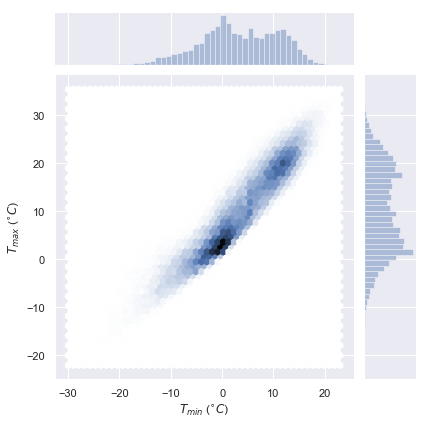

In [13]:
# here we plot the joint distributions between tmax and tmin 
ax = sns.jointplot('tmin','tmax',data=temp.reset_index(),kind='hex')
ax.set_axis_labels(xlabel='$T_{min}$ ($^{\circ}C$)', ylabel='$T_{max}$ ($^{\circ}C$)')
plt.show()

`GroupBy` and `mean()` allow us to group by an index (year) and calculate the mean of records from a column (tmax).<br>
This is a simple way to extraxt a `Series` averaging over sets of values in the `DataFrame`.<br>
We smoothen the curve using a LOWESS function (Locally Weighted Scatterplot Smoothing).

In [14]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

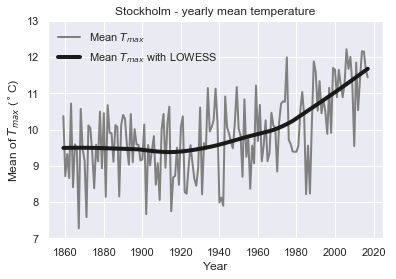

In [15]:
tmax_year_mean = temp.groupby('year')['tmax'].mean()
plt.plot(tmax_year_mean.index,tmax_year_mean.values,label='Mean $T_{max}$',lw=2,color='grey')
mean_lowess_STHLM = lowess(tmax_year_mean.values,tmax_year_mean.index,frac=0.5)
plt.plot(mean_lowess_STHLM[:,0],mean_lowess_STHLM[:,1],label='Mean $T_{max}$ with LOWESS',lw=4,color='k')
plt.legend(frameon=False)
plt.xlabel('Year'); plt.ylabel('Mean of $T_{max}$ ($^\circ$C)')
plt.title('Stockholm - yearly mean temperature'); plt.ylim(7,13); plt.show()

#### Task: use `GroupBy`,  `mean()`, and `std()` to group by year and calculate the mean and standard deviation of the mean of morning, noon, and evening temperatures. Plot the data with `Matplotlib`.<br>

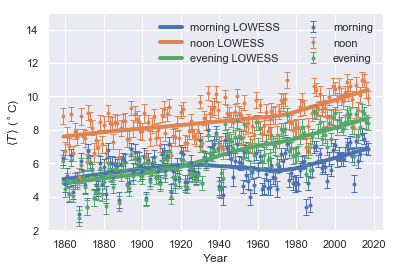

In [16]:
for i,c in zip(['morning','noon','evening'],plt.rcParams['axes.prop_cycle'].by_key()['color']):
    mean = temp.groupby('year')[i].mean()
    std = temp.groupby('year')[i].std()/np.sqrt(temp.groupby('year')[i].count())
    plt.errorbar(mean.index,mean.values,std.values,label=i,lw=0,marker='o',color=c,
                ms=3, elinewidth=1., capsize=3, capthick=1.)
    lowess_mean = lowess(mean.values,mean.index,frac=0.5)
    plt.plot(lowess_mean[:,0],lowess_mean[:,1],label=i+' LOWESS',lw=4,color=c)
plt.legend(frameon=False, ncol=2)
plt.xlabel('Year'); 
plt.ylabel(r'$\langle T \rangle$ ($^\circ$C)'); 
plt.ylim(2,15); 
plt.show()

To compute the monthly $T_{max}$, use either `GroupBy` and the `aggregate()` method, or use the convenient `pivot_table` method which groups entries into 2D tables.

In [17]:
temp.groupby(['year','month'])['tmax'].aggregate('max').unstack()[:3]

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1859,8.0,6.5,9.5,16.0,26.0,27.2,29.8,27.4,20.2,15.0,10.4,5.0
1860,5.1,2.5,6.3,14.0,19.0,25.1,27.7,23.0,20.2,12.0,7.0,3.8
1861,2.0,6.6,7.5,12.8,19.0,30.2,29.0,25.0,17.7,15.5,9.8,6.8


In [19]:
temp.pivot_table('tmax',index='year',columns='month',aggfunc='max')[:3]

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1859,8.0,6.5,9.5,16.0,26.0,27.2,29.8,27.4,20.2,15.0,10.4,5.0
1860,5.1,2.5,6.3,14.0,19.0,25.1,27.7,23.0,20.2,12.0,7.0,3.8
1861,2.0,6.6,7.5,12.8,19.0,30.2,29.0,25.0,17.7,15.5,9.8,6.8


### Case Study: Data on Waste Generation from [eurostat](http://ec.europa.eu/eurostat/data/database)
<img src="eurostat.png" width="1000" />

In this case study, we are going to analyze a data set on waste generated by EU countries categorized by economic activity, waste category, and hazard.<br>
The data set contains more than one million entries.<br>
We are going to load, parse, save, explore, and plot the data that has been downloaded from the European Commission website as a tab-separated values file. 

In [34]:
!head -n 5 env_wasgen.tsv

'head' is not recognized as an internal or external command,
operable program or batch file.


Both comma- and tab-separated column names in the header

In [35]:
df = pd.read_table('env_wasgen.tsv',header=0,sep=',|\t',engine='python')

In [36]:
df.columns.values

array(['unit', 'hazard', 'nace_r2', 'waste', 'geo\\time', '2014 ',
       '2012 ', '2010 ', '2008 ', '2006 ', '2004'], dtype=object)

We can also rename the column labels

In [37]:
df = pd.read_table('env_wasgen.tsv',header=0,sep=',|\t',engine='python',
                  names=['unit','hazard','nace_r2','waste','country','2014','2012','2010','2008','2006','2004'])

In [38]:
df.columns.values

array(['unit', 'hazard', 'nace_r2', 'waste', 'country', '2014', '2012',
       '2010', '2008', '2006', '2004'], dtype=object)

In [39]:
df.shape

(192476, 11)

NACE is the statistical classification of economic activities in the European Community<br>
* TOTAL_HH is all NACE activities plus households
* EP_HH is households
* A is agriculture, forestry and fishing 
* B is mining and quarrying
* C is manufacturing
* F	is construction

Waste Categories

In [40]:
df.waste.unique()

array(['TOTAL', 'TOT_X_MIN', 'W01-05', 'W011', 'W012', 'W013', 'W02A',
       'W032', 'W033', 'W05', 'W06', 'W061', 'W062', 'W063', 'W06_07A',
       'W071', 'W072', 'W073', 'W074', 'W075', 'W076', 'W077', 'W077_08',
       'W081', 'W0841', 'W08A', 'W09', 'W091', 'W091_092', 'W092', 'W093',
       'W10', 'W101', 'W102', 'W103', 'W11', 'W12-13', 'W121', 'W124',
       'W126', 'W126_127', 'W127', 'W128_13', 'W12A', 'W12B',
       'W12_X_127NH', 'W13'], dtype=object)

* W06 is metal waste
* W07 is glass, paper, cardboard, plastic, rubber, wood, textile, and equipment (except waste containing PCB)
* W10 is mixed ordinary wastes which includes
    * W101 Household and similar wastes
    * W102 Mixed and undifferentiated materials
	* W103 Sorting residues
* W124 is combustion waste
* W128_13 is mineral wastes from waste treatment and stabilised wastes
* TOT_X_MIN is waste excluding major mineral wastes

We rename some categories accordingly.

In [41]:
df.loc[df.waste=='TOTAL','waste']='Total'
df.loc[df.waste=='W06_07A','waste']='Recyclable'
df.loc[df.waste=='W10','waste']='Mixed' 
df.loc[df.waste=='W12-13','waste']='Mineral'

In [42]:
df.loc[14:19]

,unit,hazard,nace_r2,waste,country,2014,2012,2010,2008,2006,2004
14,KG_HAB,HAZ,A,Total,HR,0,0,0,0,0,0
15,KG_HAB,HAZ,A,Total,HU,1,2,1,1,1,2
16,KG_HAB,HAZ,A,Total,IE,5,5,8,:,0,0
17,KG_HAB,HAZ,A,Total,IS,0 b,0,0,:,:,10
18,KG_HAB,HAZ,A,Total,IT,0,0,0,0,0,0
19,KG_HAB,HAZ,A,Total,LI,0,0,0,1,:,:


In [43]:
type(df['2014'].values[0]) # values were read as string 

str

* The type of the values is $string$: to analyze the data (_e.g._ sorting, plotting) we need to convert them into numbers<br>
* Some values are missing (:) or followed by a letter (_e.g._ $e$ stands for estimated, $u$ stands for low reliability).<br>
* Forcing the conversion of all strings into numerical values (`float`), turns values followed by a letter into `NaN`s.<br>
* We trim non-digit values using `map()`, a `lambda` function, and `strip()`.<br>
* We use pd.to_numeric to convert.

In [44]:
for col in df.columns:
    if col[0] == '2': # check the the column name starts with 2, i.e. it's a year
        df[col] = df[col].map(lambda x: x.rstrip('bcdefinprsuz')) # remove trailing char from each value of the column
        df[col] = pd.to_numeric(df[col], errors='coerce')
print(df['2014'].values)
type(df['2014'].values[0])

[ 1. nan  2. ... nan nan nan]


numpy.float64

#### Task: Create a `Series` from the dictionary { 'EE' : '14759.4713a', 'LU' : '195.677c', 'NL': '111.437b', 'SE': '596.8ba' } and use `map()` and `rstrip` as above to remove the characters 'abc'

In [45]:
series = pd.Series( { 'EE' : '1459.4713a', 'LU' : '195.677c', 'NL': '111.437b', 'SE': '596.8ba' } )
series

EE    1459.4713a
LU      195.677c
NL      111.437b
SE       596.8ba
dtype: object

In [46]:
def strip_abc(item):
    return item.rstrip('abc')
series = series.map(strip_abc)
series

EE    1459.4713
LU      195.677
NL      111.437
SE        596.8
dtype: object

We defined the function `strip` that takes a string and uses `strip` to remove any a, b, or c character from each item of the `list` named $l$.<br>
Instead, we can use a `lambda function`.

In [ ]:
print( list( map(lambda item: item.strip('abc'),series) ) )

#### Hazardous waste in UK
We can now select data based on waste category, hazard, source (economic activity), country, and unit (tons or kilograms per capita).

In [47]:
df.loc[(df.hazard == 'HAZ') & (df.unit == 'KG_HAB')
        & (df.nace_r2=='TOTAL_HH') & (df.country == 'UK')][:5]

,unit,hazard,nace_r2,waste,country,2014,2012,2010,2008,2006,2004
24396,KG_HAB,HAZ,TOTAL_HH,Total,UK,89.0,101.0,112.0,118.0,139.0,133.0
24434,KG_HAB,HAZ,TOTAL_HH,TOT_X_MIN,UK,74.0,82.0,93.0,93.0,130.0,125.0
24472,KG_HAB,HAZ,TOTAL_HH,W01-05,UK,32.0,40.0,39.0,49.0,61.0,65.0
24510,KG_HAB,HAZ,TOTAL_HH,W011,UK,4.0,4.0,3.0,5.0,7.0,8.0
24548,KG_HAB,HAZ,TOTAL_HH,W012,UK,1.0,2.0,3.0,6.0,11.0,12.0


### MultiIndex Creation

The first 5 columns of this multi-dimensional data are used to store the keys. Pandas provides $hierarchical$ $indexing$ to represent this data as a 2D `DataFrame`.

In [48]:
df_multiple = df.set_index(['unit','hazard','nace_r2','waste','country'])

In [49]:
df_multiple.index.names

FrozenList(['unit', 'hazard', 'nace_r2', 'waste', 'country'])

In [51]:
df_multiple.head()


2014  2012  2010  2008  2006  2004
unit   hazard nace_r2 waste country                                    
KG_HAB HAZ    A       Total AT        1.0   1.0   9.0   8.0   2.0   1.0
                            BA        NaN   0.0   NaN   NaN   NaN   NaN
                            BE        2.0   2.0   2.0   2.0   1.0   2.0
                            BG        0.0   0.0   0.0   0.0   0.0   0.0
                            CY        1.0   1.0   NaN   1.0   1.0  10.0

In [50]:
df_multiple.columns

Index(['2014', '2012', '2010', '2008', '2006', '2004'], dtype='object')

Alternative MultiIndex Creation:

In [ ]:
index = pd.MultiIndex.from_arrays([df.unit,df.hazard,df.nace_r2,df.waste,df.country],
                                  names=['unit','hazard','nace_r2','waste','country'])

In [ ]:
df_multiple = pd.DataFrame(df.iloc[:,5:11].values,index=index,columns=['2014','2012','2010','2008','2006','2004'])

In [52]:
df_multiple[::1000][:4]

2014  2012  2010  2008  2006  2004
unit   hazard nace_r2 waste   country                                    
KG_HAB HAZ    A       Total   AT        1.0   1.0   9.0   8.0   2.0   1.0
                      W128_13 FI        0.0   0.0   0.0   NaN   NaN   NaN
              B       Mineral BE        0.0   0.0   0.0   0.0   0.0   0.0
              C       W081    AT        0.0   0.0   0.0   0.0   0.0   0.0

#### Task: what percentage of the total non-hazardous waste was generated by agricilture in UK in 2014?

In [57]:
totalUK = df_multiple.loc['KG_HAB','NHAZ','TOTAL_HH','Total','UK']['2014']
agricultureUK = df_multiple.loc['KG_HAB','NHAZ','B','Total','UK']['2014']
print('Waste from agriculture in UK in 2014: {:1.1f}%'.format(agricultureUK/totalUK*100))

Waste from agriculture in UK in 2014: 10.7%


### Ranking countries by waste generated in 2014
Here we select one household waste category and rank the countries by waste generation in 2014.

In [54]:
dfTotal = df_multiple.loc['KG_HAB','NHAZ','EP_HH','Total'].sort_values(by='2014',ascending=False)
dfRecyclable = df_multiple.loc['KG_HAB','NHAZ','EP_HH','Recyclable'].sort_values(by='2014',ascending=False)
dfMixed = df_multiple.loc['KG_HAB','NHAZ','EP_HH','Mixed'].sort_values(by='2014',ascending=False)

`DataFrames` can be conveniently saved as Excel files.

In [58]:
output = pd.ExcelWriter('waste.xlsx')
dfTotal.to_excel(output,'Sheet1',index=False)
dfRecyclable.to_excel(output,'Sheet2',index=False)
dfMixed.to_excel(output,'Sheet3',index=False)
output.save()
dfTotal[:5]

,2014,2012,2010,2008,2006,2004
country,,,,,,
IS,892.0,721.0,729.0,NaN,NaN,484.0
LI,724.0,8623.0,0.0,0.0,NaN,NaN
DK,592.0,586.0,627.0,457.0,380.0,373.0
NL,489.0,512.0,530.0,559.0,561.0,563.0
IT,486.0,501.0,545.0,550.0,558.0,539.0


### Comparison between UK and EU average

#### Total waste from household and all NACE Rev. 2 activities 

In [59]:
df_multiple.loc['KG_HAB','NHAZ','TOTAL_HH','Total'].loc[('EU28','UK'),:]

,2014,2012,2010,2008,2006,2004
country,,,,,,
EU28,4728.0,4729.0,4677.0,4655.0,4958.0,4982.0
UK,3796.0,3586.0,3657.0,4448.0,4646.0,4848.0


#### Task: compare the total waste from mining (NACE Rev.2 B) in 2014 in your country to the EU average

In [ ]:
df_multiple.loc['KG_HAB','NHAZ','B','Total'].loc[('EU28','UK'),:]['2014']

#### Cross-Section of a `DataFrame` [focusing on a subcategory (waste type) for all supercategories (activities)]: Which activities generated most of the recyclable wastes in Sweden in 2014

In [ ]:
df_multiple.loc['KG_HAB','HAZ_NHAZ'][['2014']].xs(('Recyclable','UK'),
                                     level=['waste','country']).sort_values(by='2014',ascending=False)[:3]

#### Plotting the yearly progress in Swedish, Finnish, and British mining waste generation compared to the EU average

In [ ]:
for country, c in zip(['SE','EU28','FI','UK'],['r','b','g','y']):
    years = df_multiple.loc['KG_HAB','NHAZ','B','Total'].loc[country]
    plt.plot(years.index.astype(int),years.values,color=c)
    plt.plot(years.index.astype(int),years.values,label=country,color=c,marker='X',lw=0,ms=10)
plt.legend(frameon=False,ncol=2,labelspacing=1.5)
plt.yscale('log'); plt.ylabel('kilograms per capita'); plt.xlabel('year'); plt.show()

##### Task: Plot the yearly progress in UK household recyclable and mixed waste generation compared to the EU average

In [ ]:
for country in ['UK','EU28']:
    for waste, c in zip(['Mixed','Recyclable'],['r','b']):
        years = df_multiple.loc['KG_HAB','NHAZ','EP_HH',waste].loc[country]
        ls = '--' if (country == 'EU28') else '-'
        m = 'o' if (country == 'EU28') else 's'
        plt.plot(years.index.astype(int),years.values,color=c,ls=ls)
        plt.plot(years.index.astype(int),years.values,label=waste+', '+country,color=c,marker=m,lw=0,ms=10)
plt.legend(frameon=False,ncol=2,labelspacing=1.5)
plt.ylabel('kilograms per capita'); plt.xlabel('year'); plt.show()

Now we want to create a stacked bar plot showing the total, recyclable, and mixed household waste for each country ranked in ascending order with respect to the total household waste in 2014.<br>
The `DataFrames` `dfMixed`, `dfTotal`, and `dfRecyclable` were sorted based on the respective 2014 values. Now we want to sort them based on the 2014 values of `df_tot`.

In [ ]:
dfMixed = dfMixed.reindex(dfTotal.index)
dfRecyclable = dfRecyclable.reindex(dfTotal.index)

In [ ]:
ind = range(dfMixed['2014'].values.size) # the x locations for the groups
width = 0.35 # the width of the bars: can also be len(x) sequence
plt.bar(ind, dfTotal['2014'].values, width, label='Total')
plt.bar(ind, dfRecyclable['2014'].values, width, label='Recyclable')
plt.bar(ind, dfMixed['2014'].values, width, bottom=dfRecyclable['2014'].values, label='Mixed ordinary')
plt.ylabel('kilograms per capita'); plt.title('Household Waste in 2014')
plt.xticks(ind, dfTotal.index, rotation=45); plt.xlim(-.5,18.5)
plt.legend(loc='upper right',frameon=False); plt.show()

#### Task: create a bar plot showing the mineral waste generated by each country from mining (NACE Rev.2 B) and construction (NACE Rev.2 F) ranked in ascending order with respect to the sum mining+construction (select data from 2014)

In [ ]:
dfMining = df_multiple.loc['KG_HAB','HAZ_NHAZ','B','Mineral']
dfConstruction = df_multiple.loc['KG_HAB','HAZ_NHAZ','F','Mineral']
dfSum = dfMining + dfConstruction
dfSum = dfSum.sort_values(by='2014',ascending=False)
dfMining = dfMining.reindex(dfSum.index)
dfConstruction = dfConstruction.reindex(dfSum.index)
ind = range(dfConstruction['2014'].values.size)
plt.bar(ind, dfMining['2014'].values, width, label='Mining')
plt.bar(ind, dfConstruction['2014'].values, width, 
             bottom=dfMining['2014'].values, label='Construction')
plt.ylabel('kilograms per capita'); plt.title('Mineral and solidified wastes in 2014')
plt.xticks(ind, dfMining.index, rotation=45); plt.xlim(-.5,18.5)
plt.legend(loc='upper right',frameon=False); 
plt.show()

### Case Study: Data on Waste Treatment from [eurostat](http://ec.europa.eu/eurostat/data/database)

In [ ]:
!head -n 1 env_wastrt.tsv

In [ ]:
wasteTreatment = pd.read_table('env_wastrt.tsv',header=0,sep=',|\t',engine='python',
                   names=['unit','hazard','wst_oper','waste','country','2014','2012','2010','2008','2006','2004'])

Here we rename some of the waste treatment operations

In [ ]:
wasteTreatment.loc[wasteTreatment.wst_oper=='TRT','wst_oper']='Total'
wasteTreatment.loc[wasteTreatment.wst_oper=='DSP_L','wst_oper']='Landfill'
wasteTreatment.loc[wasteTreatment.wst_oper=='INC','wst_oper']='Incineration/Disposal' 
wasteTreatment.loc[wasteTreatment.wst_oper=='RCV_E','wst_oper']='Incineration/Energy recovery'
wasteTreatment.loc[wasteTreatment.wst_oper=='RCV_B','wst_oper']='Backfilling'
wasteTreatment.loc[wasteTreatment.wst_oper=='RCV_O','wst_oper']='Recovery'

In [ ]:
wasteTreatment = wasteTreatment.set_index(['unit','hazard','wst_oper','waste','country'])

In [ ]:
for col in wasteTreatment.columns:
    wasteTreatment[col] = wasteTreatment[col].map(lambda x: x.rstrip('bcdefinprsuz'))
    wasteTreatment[col] = pd.to_numeric(wasteTreatment[col], errors='coerce')

#### Plastic waste treatment in the EU in 2014

In [ ]:
total = wasteTreatment.loc['T','HAZ_NHAZ','Total','W074'][['2014']]
incinerated = wasteTreatment.loc['T','HAZ_NHAZ','Incineration/Energy recovery','W074'][['2014']]
sorter = (incinerated/total).sort_values(by='2014',ascending=False)
total = total.reindex(sorter.index)
ind = range(sorter.index.size)
width = 0.35
bottom = np.zeros(sorter.index.shape,dtype=float)

In [ ]:
for operation in ['Recovery','Backfilling','Landfill','Incineration/Disposal','Incineration/Energy recovery']:     
    op = wasteTreatment.loc['T','HAZ_NHAZ',operation,'W074'][['2014']]
    op = op.reindex(sorter.index)
    ratio_op = op / total
    plt.bar(ind[:21], ratio_op['2014'].values[:21], width, bottom=bottom[:21], label=operation)
    bottom = np.add(ratio_op['2014'].values,bottom)
plt.ylabel('Fraction of total plastic wastes'); plt.title('Treatment of plastic wastes in 2014')
plt.xticks(ind, sorter.index, rotation=45); plt.xlim(1.5,20.5); plt.ylim(0,1.6)
plt.legend(loc='upper right',frameon=False,ncol=2); plt.show()

### Case Study: Data Scraping – Temperature in Oxford

Gather data from a website.<br>
Here we show how to read an HTML page.

In [ ]:
from lxml import html 
import requests
from time import sleep
import io

In [ ]:
url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt'
response = requests.get(url)
sleep(3)
parser = html.fromstring(response.text)

In [ ]:
tempOxford = pd.read_table(io.StringIO(parser.text),header=None,engine='python',delim_whitespace=True,
                     skiprows=range(7),names=['yyyy','mm','tmax','tmin','af','rain','sun','comment'])

We set $year$ and $month$ labels as indeces and remove the last four columns from the `DataFrame`

In [ ]:
tempOxford.set_index(['yyyy','mm'],inplace=True)
tempOxford.drop(['af','rain','sun','comment'],axis=1,inplace=True)
tempOxford[-8:-5]

Since some values are marked with a * to indicate that they are estimates, temperatures were read as strings.<br>
Now we convert them to numbers.

In [ ]:
for col in tempOxford.columns:
    tempOxford[col] = tempOxford[col].map(lambda x: x.rstrip('*'))
    tempOxford[col] = pd.to_numeric(tempOxford[col], errors='coerce')
    


In [ ]:
tempOxford[-8:-5]

### Date Formatting – Temperature in L'Aquila (in Italy)

Some useful keywords in `pd.read_table()`:
* na_vaules: sets the values to be replaced by `NaN` 
* parse_dates: we specify the column so that dates are interpreted as such instead of as $strings$
* date_parser: we specify a labda function to parse dates according to our format

In [ ]:
temp_aquila = pd.DataFrame()
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
for year in range(1968,2019):
    url = 'http://meteorema.aquila.infn.it/tempaq/dati/hist/'+str(year)+'.txt'
    temp_year_aquila = pd.read_table(url,header=None,engine='python',delim_whitespace=True,
                     comment='#',names=['Date','day','tmin','tmax'],na_values=-999.99,
                     parse_dates=['Date'], date_parser=dateparse)
    temp_aquila = temp_aquila.append(temp_year_aquila,ignore_index=True)


In [ ]:
temp_aquila.head()
temp_aquila.to_csv('temperatureItaly.csv')

In [ ]:
temp_aquila.columns

In [ ]:
temp_aquila.drop('day',axis=1,inplace=True)
temp_aquila.columns

In [ ]:
temp_aquila['year'] = temp_aquila['Date'].dt.year
temp_aquila['month'] = temp_aquila['Date'].dt.month
temp_aquila['day'] = temp_aquila['Date'].dt.day
temp_aquila.drop('Date',axis=1,inplace=True)
temp_aquila.set_index(['year','month','day'],inplace=True)
temp_aquila.dropna()
temp_aquila[-3:]

In [ ]:
tmax_year_mean_ox = tempOxford.groupby('yyyy')['tmax'].mean()
tmax_year_mean_ox

In [ ]:
mean_lowess_OXFORD = lowess(tmax_year_mean_ox.values,tmax_year_mean_ox.index,frac=0.5)
mean_lowess_OXFORD

In [ ]:
tmax_year_mean_aq = temp_aquila.groupby('year')['tmax'].mean()
mean_lowess_AQUILA = lowess(tmax_year_mean_aq.values,tmax_year_mean_aq.index,frac=0.5)
plt.plot(mean_lowess_AQUILA[:,0],mean_lowess_AQUILA[:,1],label="Mean $T_{max}$ in L'Aquila",lw=4,color='b')
plt.plot(mean_lowess_OXFORD[:,0],mean_lowess_OXFORD[:,1],label='Mean $T_{max}$ in Oxford',lw=4,color='r')
plt.plot(mean_lowess_STHLM[:,0],mean_lowess_STHLM[:,1],label='Mean $T_{max}$ in Stockholm',lw=4,color='g')
plt.legend(frameon=False)
plt.xlabel('Year'); plt.ylabel('Mean of $T_{max}$ ($^\circ$C)'); plt.show()